# Isomorphic graphs

Isomorphic graph representations are different representations for the same exact graph. Here we explore how many such structures exist when number of vertices are 3 and 4 and no self loops exist.

In [1]:
import itertools
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
NUM_VERTEX = 3

In [3]:
mainSet = []
for x in itertools.product([0,1],repeat=NUM_VERTEX**2):
    mat = np.reshape(x,[NUM_VERTEX,NUM_VERTEX])
    if 1 not in mat.diagonal(0):
        mainSet.append(mat)

In [4]:
len(mainSet)

64

In [5]:
isomorphicTranslations = []
for x in itertools.permutations(range(0,NUM_VERTEX), NUM_VERTEX):
    isomorphicTranslations.append(list(x))

In [6]:
isomorphicTranslations

[[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]

In [7]:
def getIsoMorphicGraph(mat, translation):
    result = np.zeros([NUM_VERTEX,NUM_VERTEX], dtype=np.int)
    for i in range(0,NUM_VERTEX):
        for j in range(0,NUM_VERTEX):
            result[translation[i], translation[j]] = mat[i, j]
    return result

def getAllIsomorphicGraphs(mat):
    return map(lambda x : getIsoMorphicGraph(mat, x), isomorphicTranslations)

We map every equivalent graph to a hash. This is what is used to identify the groupings.

In [8]:
PRIMES = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199])
def hashMat(mat):
    arrs = getAllIsomorphicGraphs(mat)
    primeMultiplied =  map(lambda x: np.reshape(x, [1,(NUM_VERTEX**2)])[0] * PRIMES[:(NUM_VERTEX**2)] , arrs)
    filtered = map(lambda x: filter(lambda p: p!=0, x), primeMultiplied)
    hashRanks = map(lambda x: reduce(lambda p,q: p*q, x, 1 ), filtered)
    arr_to_be_hashed = arrs[np.argmin(hashRanks)]
    return "".join(map(str,np.reshape(arr_to_be_hashed,[1,NUM_VERTEX**2])[0]))

In [9]:
grouping = {}
for x in mainSet:
    hashOfMat = hashMat(x)
    if hashOfMat in grouping:
        grouping[hashOfMat].append(x)
    else:
        grouping[hashOfMat] = [x]

In [10]:
len(grouping)

16

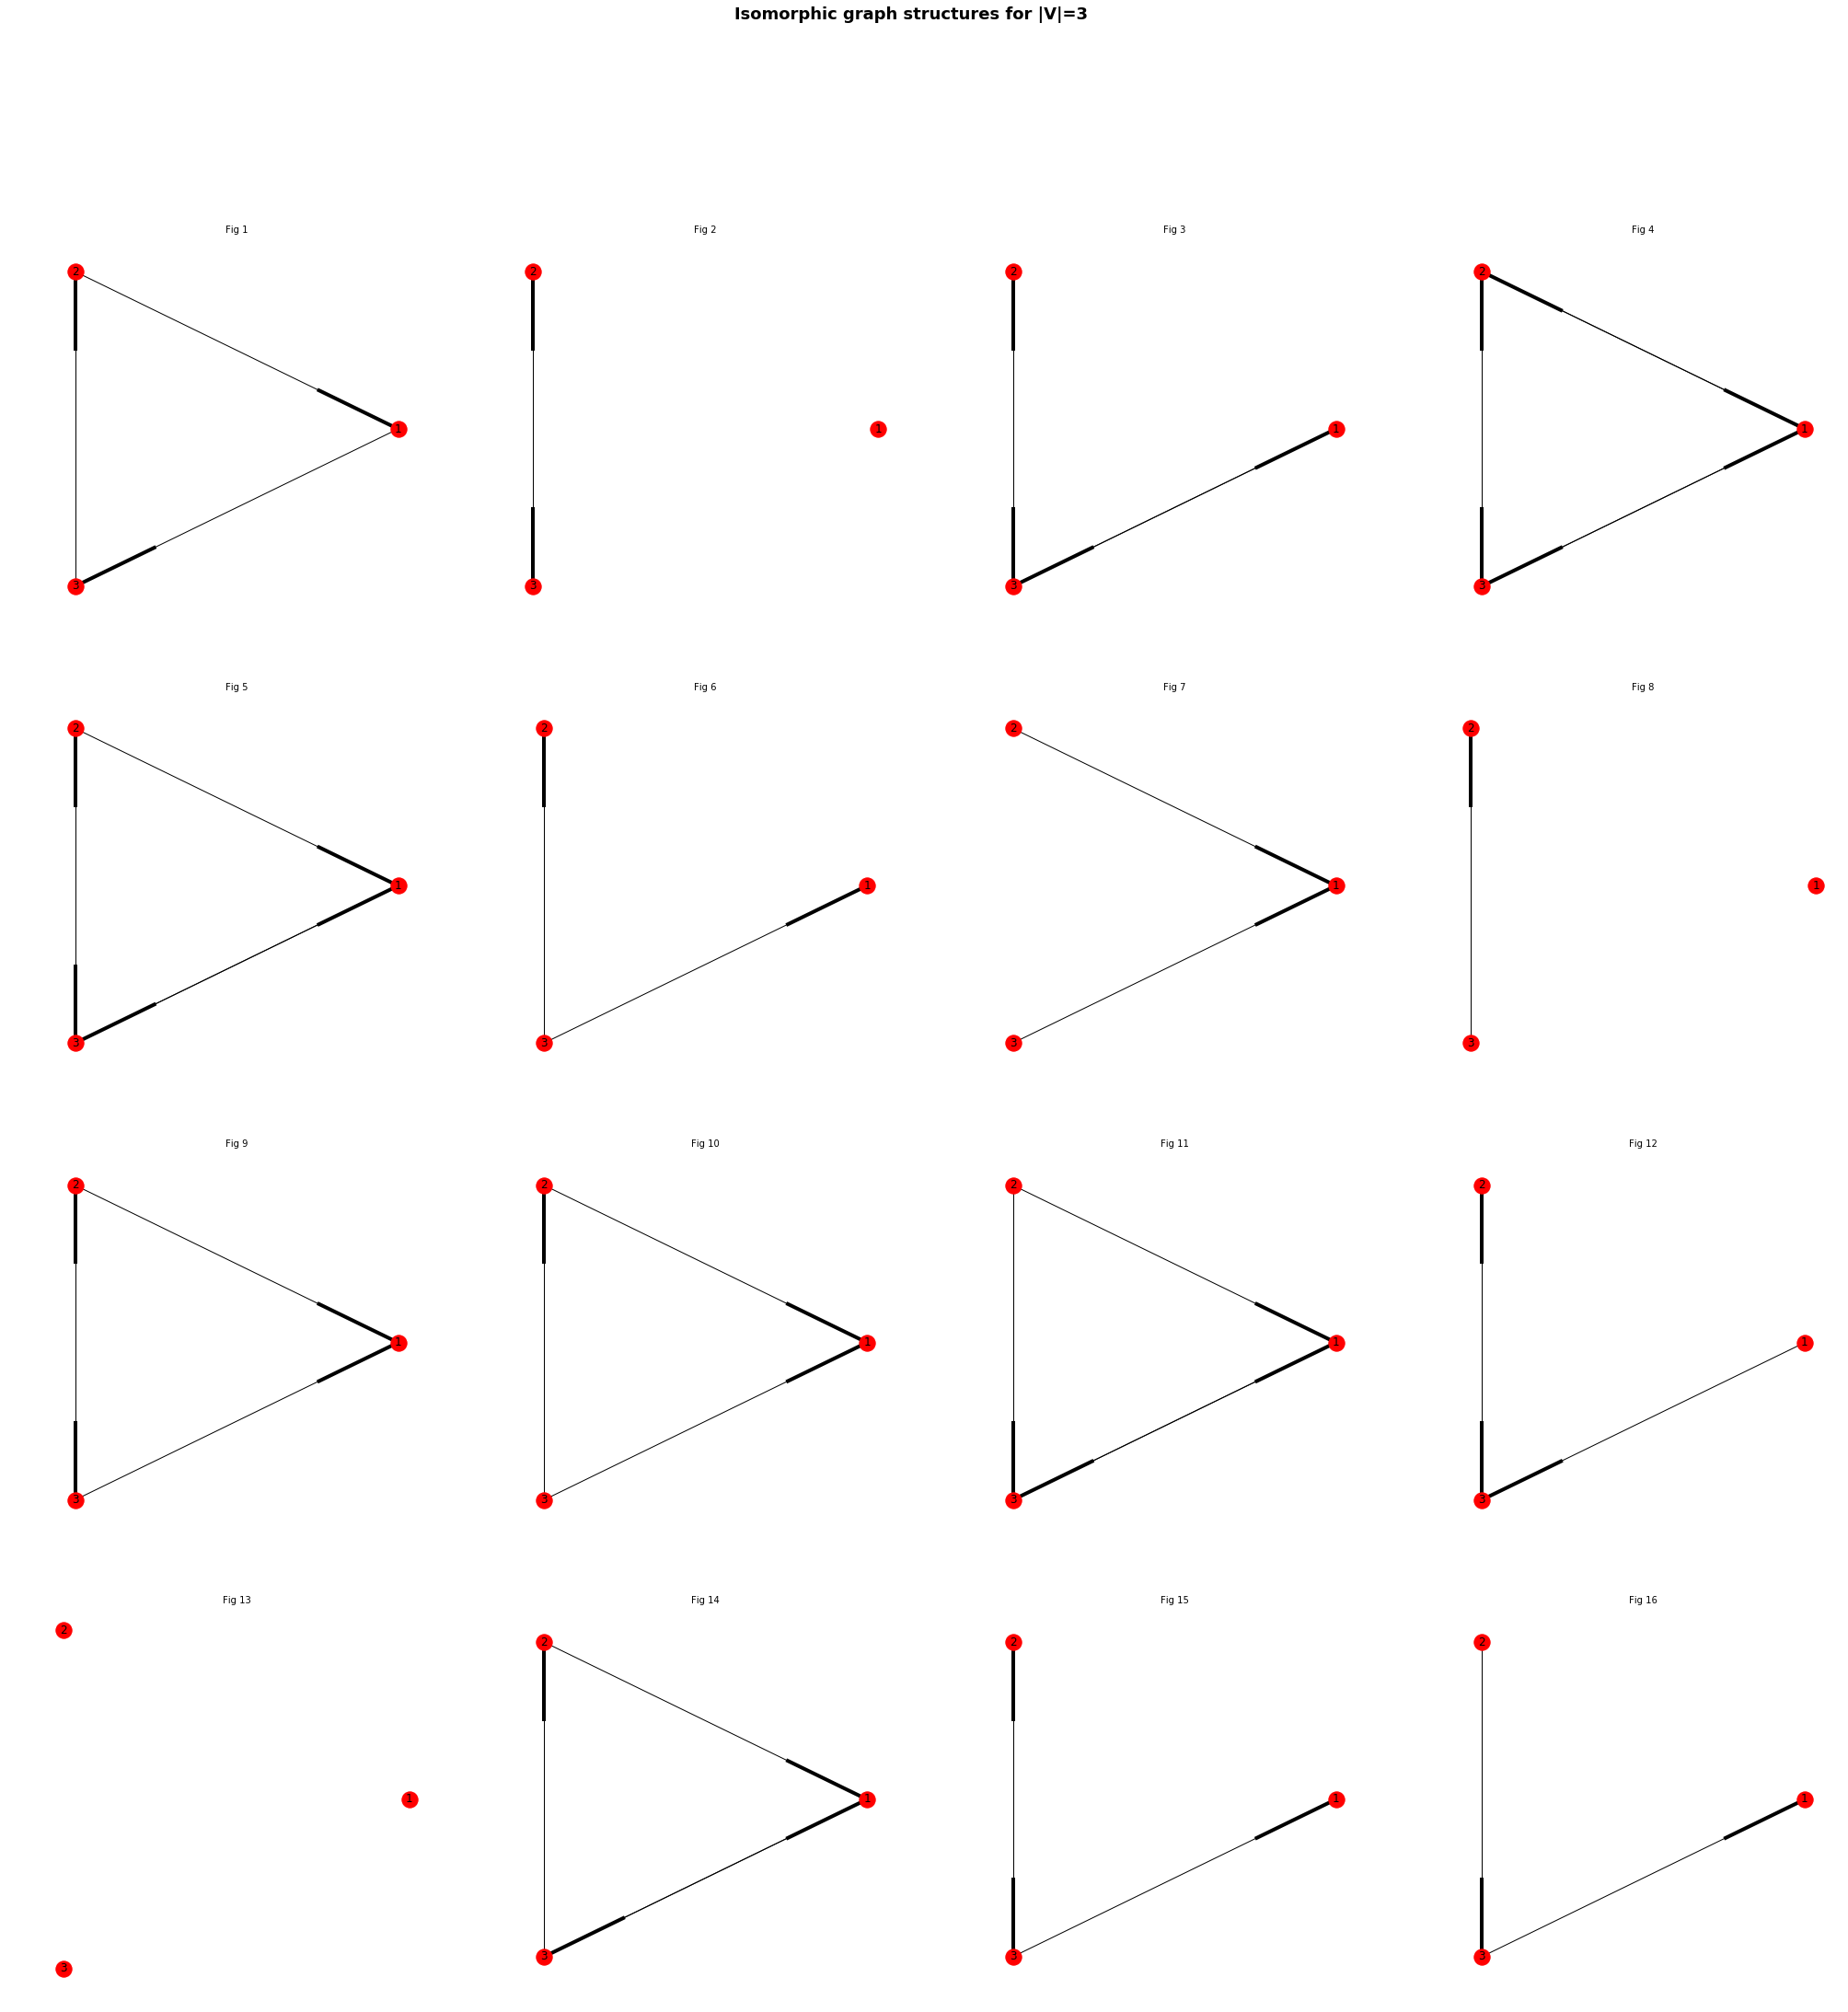

In [11]:
fig = plt.figure(1, figsize=(35,35))
plt.clf()


fig.suptitle('Isomorphic graph structures for |V|=%d' % NUM_VERTEX, fontsize=18, fontweight='bold')

nr = int(np.ceil(np.sqrt(len(grouping))))
fig, ax = plt.subplots(nr, nr, num=1)

for i, j in enumerate(grouping):
    k = grouping[j]
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    
    G = nx.from_numpy_matrix(grouping[j][0], create_using=nx.MultiDiGraph())
    pos = nx.circular_layout(G)

    nx.draw_circular(G)
    labels = {i : i + 1 for i in G.nodes()}
    
    nx.draw_networkx_labels(G, pos, labels, font_size=12, ax=ax[ix])

    ax[ix].set_title("Fig %d" % (i+1), fontsize=10)
    ax[ix].set_axis_off()

plt.show()

## Here is the resultant graphs when number of vertices is 4

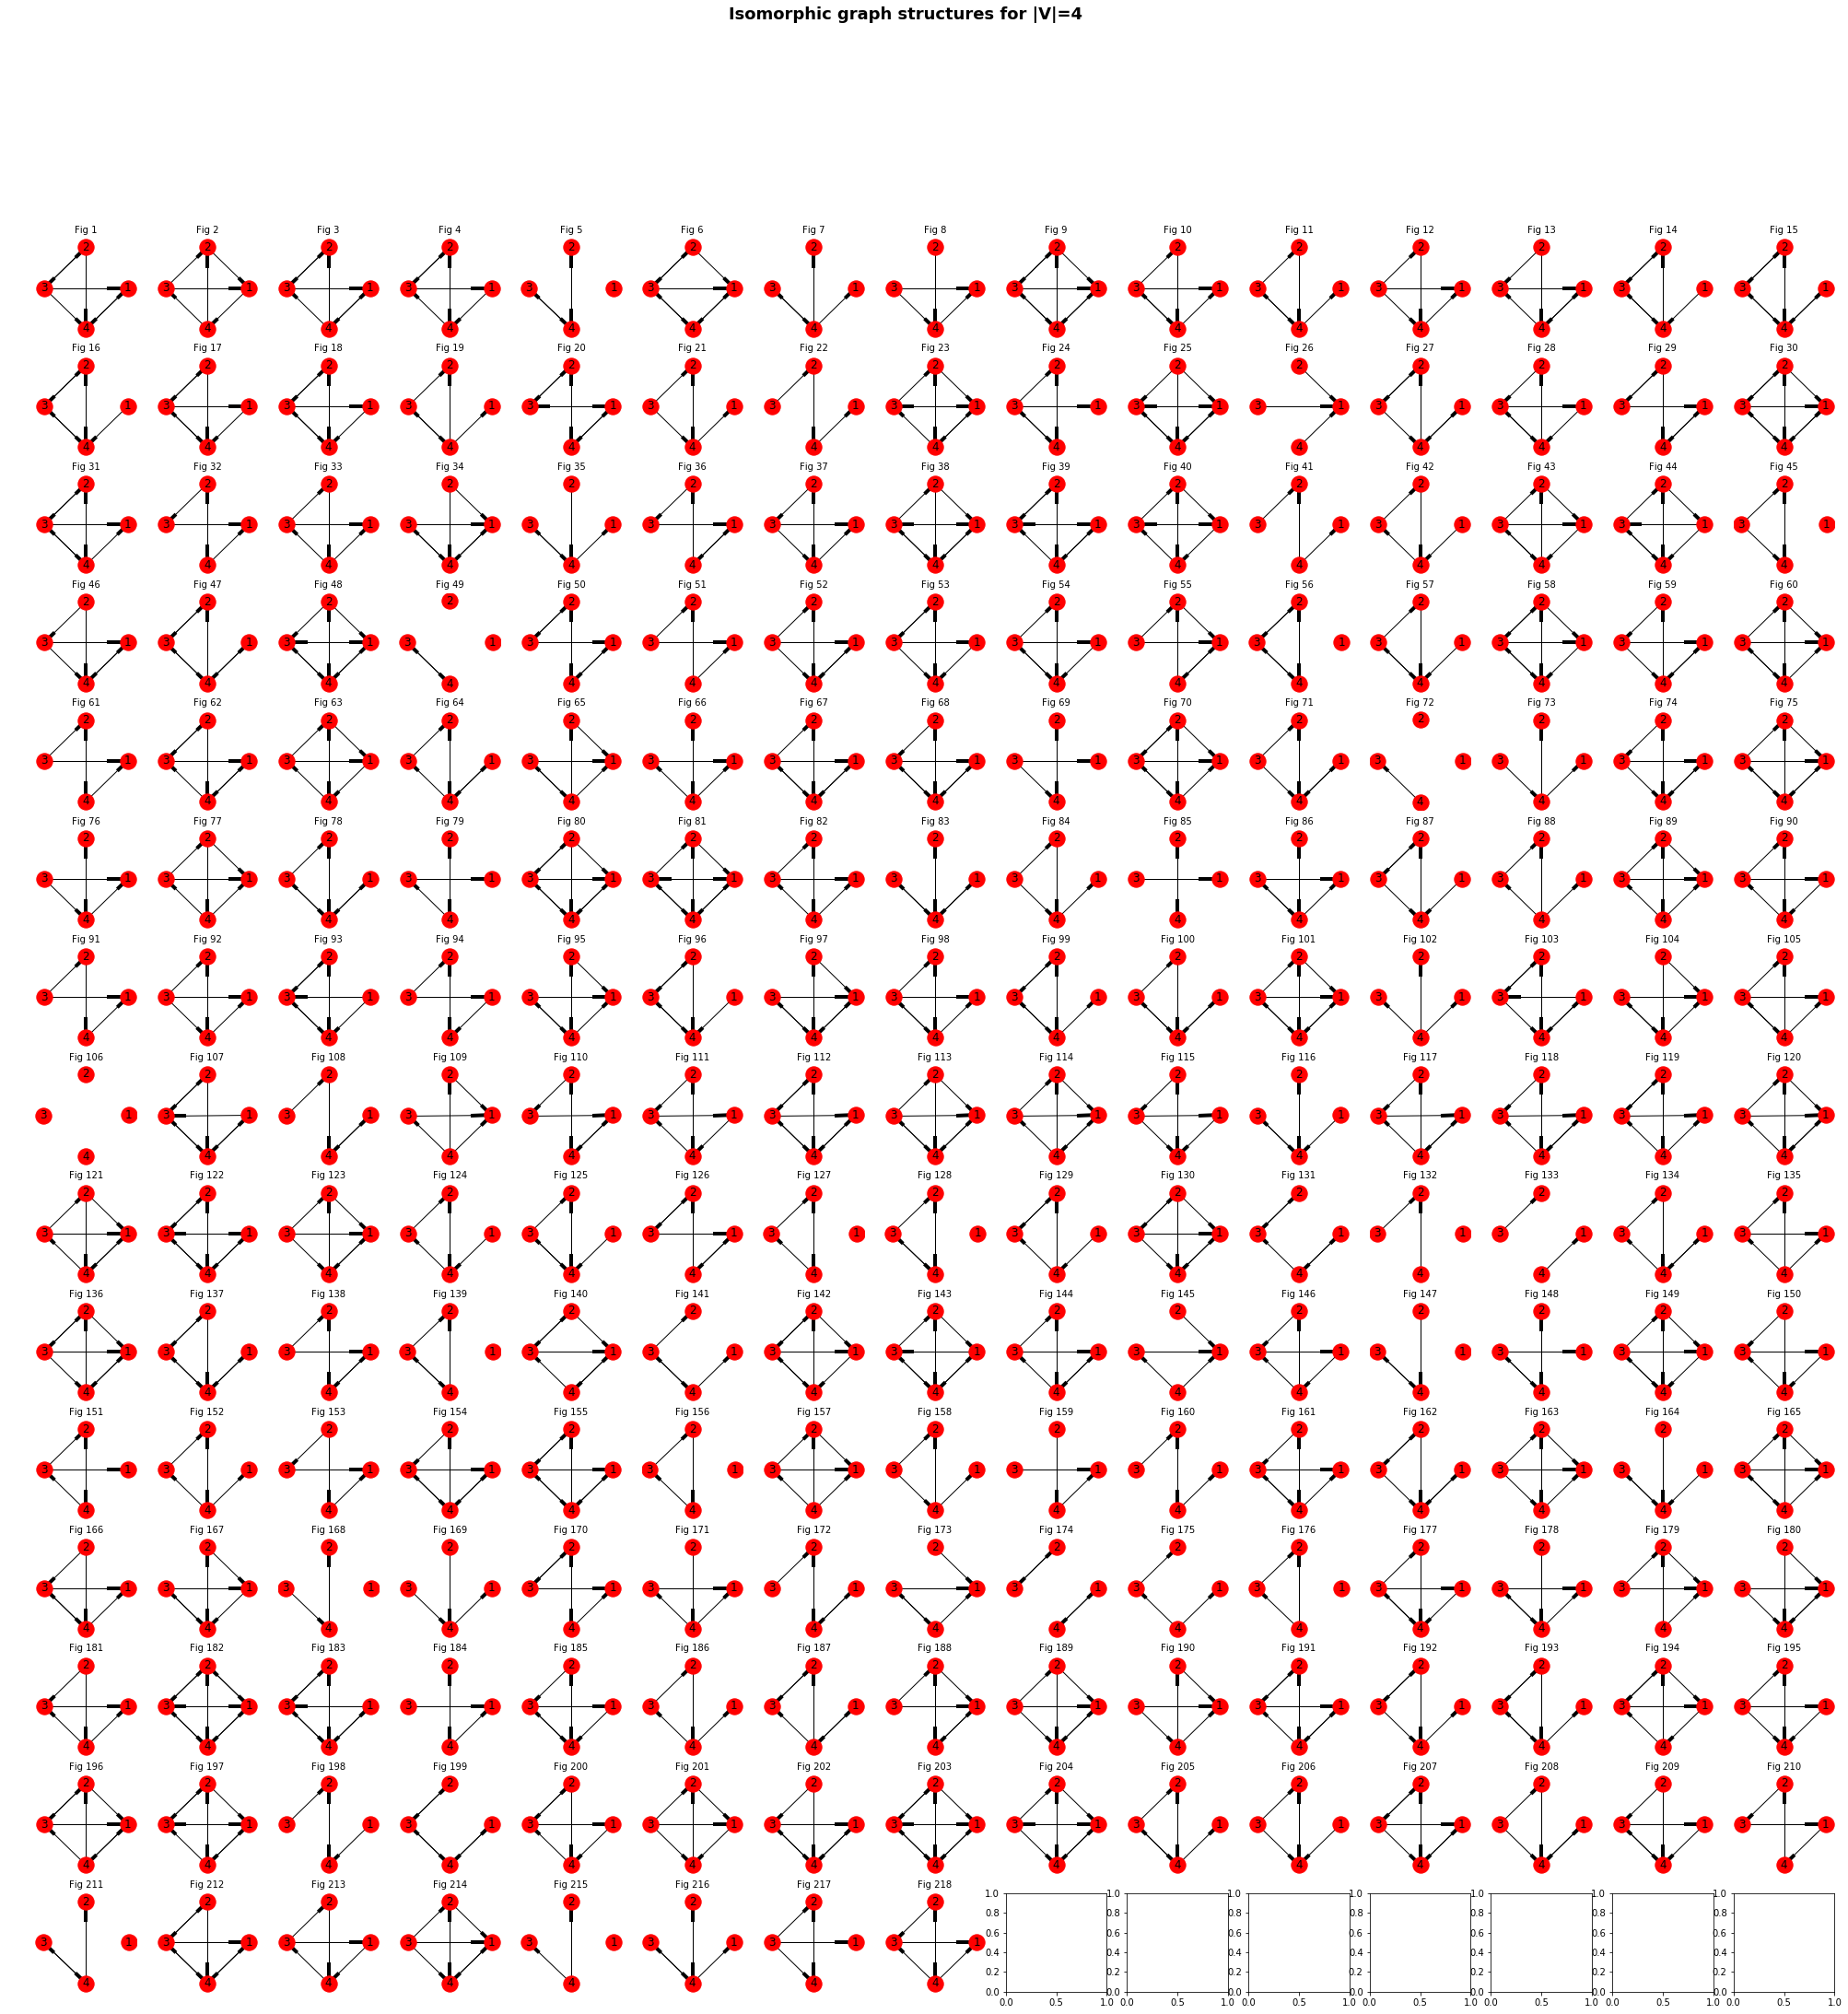